In [1]:
# All the installs and imports that is needed for word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

#After installation, please restart the notebook if browse option is not showed when the next cell in being run.

Installing C:\Users\TN\Anaconda3\lib\site-packages\fileupload\static -> fileupload
Making directory: C:\Users\TN\AppData\Roaming\jupyter\nbextensions\fileupload\
Copying: C:\Users\TN\Anaconda3\lib\site-packages\fileupload\static\extension.js -> C:\Users\TN\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Copying: C:\Users\TN\Anaconda3\lib\site-packages\fileupload\static\widget.js -> C:\Users\TN\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Making directory: C:\Users\TN\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload
Copying: C:\Users\TN\Anaconda3\lib\site-packages\fileupload\static\fileupload\widget.js -> C:\Users\TN\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


In [6]:
# Uploader widget
#For uploading the text file

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `The Adventures of Sherlock Holmes.txt` (580.27 kB)


In [37]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", \
    "upon","for","out","so","than","not","said","in","there","up","into","on","one","should","would","over","must", \
    "may","could","shall","then","down","about","other","before","than","two","us","come","came","back","away","only", \
    "might","much","however","most"]
    
    uninteresting_words_cap = list()
    for word in uninteresting_words:
        word_cap = word.capitalize()
        uninteresting_words_cap.append(word_cap)
    

    without_punctuations = ""
    for i in file_contents:
        #Removing the punctuations
        if i not in punctuations:
            without_punctuations += i    
    
    words_list = without_punctuations.split()
    interesting_words = list()
    
    for word in words_list:
        #Removing uninteresting words and numerical values
        if word.isalpha() and word not in uninteresting_words and word not in uninteresting_words_cap:  
            interesting_words.append(word)
    
    #Dictionary to calculate word frequency
    word_frequency = dict()
    for word in interesting_words:
        word_frequency[word] = word_frequency.get(word,0)+1
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(word_frequency)
    return cloud.to_array()

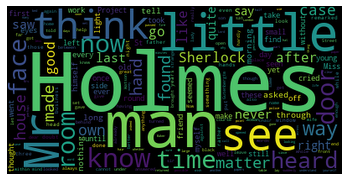

In [39]:
# Display the wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'lanczos')
plt.axis('off')
plt.show()

